# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Import Libraries

In [236]:
# Libraries to work on the dataframe

import pandas as pd
import numpy as np

# Data Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 2: Read and analyse the data set

In [25]:
lead_df = pd.read_csv('Leads.csv')

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [26]:
# Check the shape
lead_df.shape

(9240, 37)

In [27]:
# Check statistical details
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [28]:
# Check column details
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [29]:
# Check for duplicate values in "Prospect ID" column
sum(lead_df.duplicated(subset = "Prospect ID")) == 0

True

In [30]:
# Check for duplicate values in "Lead Number" column
sum(lead_df.duplicated(subset = "Lead Number")) == 0

True

#### Observations

1. A large number of columns have null values and can be dropped.
2. Prospect ID and Lead Number are used as an identification for the people contacted and have unique values and can be dropped.
3. Some columns have 'Select' as values and needs to be replaced with Null.

## Step 3: EDA

#### Data Cleaning

In [31]:
# Drop "Prospect ID" & "Lead Number" columns

lead_df.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [32]:
# Replace columns with 'Select' values with null
lead_df = lead_df.replace('Select', np.nan)

In [33]:
# Check for null values
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [34]:
# Check percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [35]:
# Identify columns with > 40% Null values
col_list=lead_df.columns
col_list_drop = []

for i in col_list:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 40):
        col_list_drop.append(i)
print(col_list_drop)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [36]:
# Drop columns with > 40% Null values

for col in col_list_drop:
    lead_df.drop(col,axis=1,inplace=True)

In [37]:
#Check for shape
lead_df.shape

(9240, 28)

In [38]:
# Checking null values 

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Observations

1. There are still high % of Null values in the columns: Country, Specialization, "What is your current occupation", "What matters most to you in choosing a course", Tags and city.
2. Univariate analysis to be done to see how to deal with the Null values

#### Categorical variable analysis:

1. Country

In [39]:
# Check for % of values

lead_df.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [40]:
# Since India is the most common occurence, we will impute all missing values with India

lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

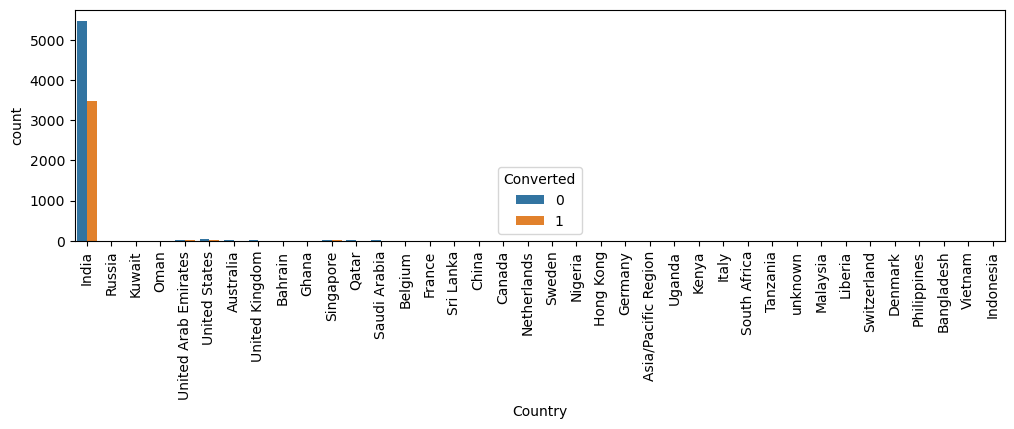

In [41]:
#plotting countplot Country columnn after replacing NaN values

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df.Country, hue= lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.show()

#### Observation

India has 97% of the data suggesting a heavily skewed column and needs to be dropped.

In [42]:
lead_df.drop('Country', axis = 1, inplace = True)

In [43]:
# Checking value counts of "City" column

lead_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [44]:
# Replace Null values with Mumbai since Mumbai has the highest count

lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

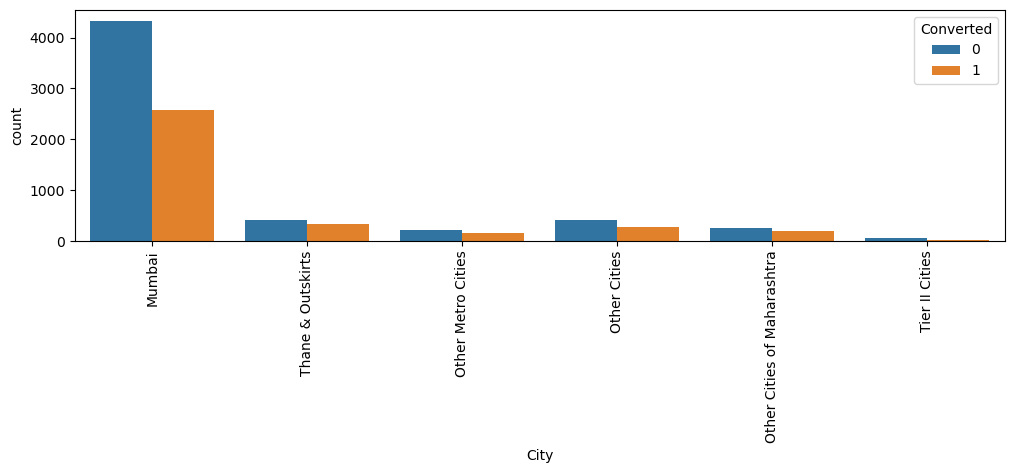

In [52]:
#plotting countplot City columnn after replacing NaN values

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df.City, hue= lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.show()

In [55]:
#checking value counts of Specialization column

lead_df['Specialization'].value_counts(dropna=False)

Not Available                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [47]:
# Replace Null with Not Available
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Available')

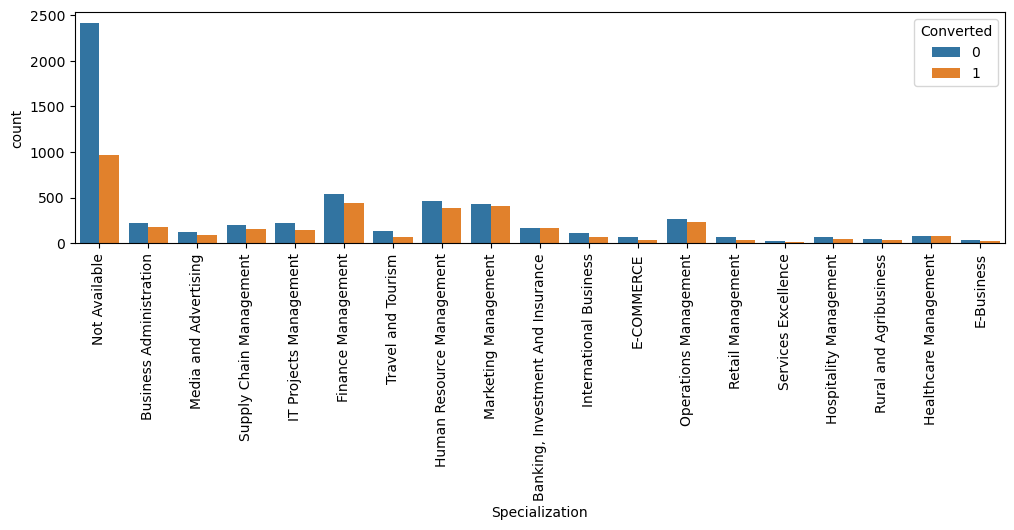

In [53]:
#plotting countplot of Specialization columnn 

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.show()

#### Observation:

Management Specializations have a significant % and needs to be analysed further. Also. Conversion rate is high for Management specializations.

In [56]:
# Checking value counts for 'What matters most to you in choosing a course' column

lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [57]:
# Imputing Null values with 'Better Career Prospects'

lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

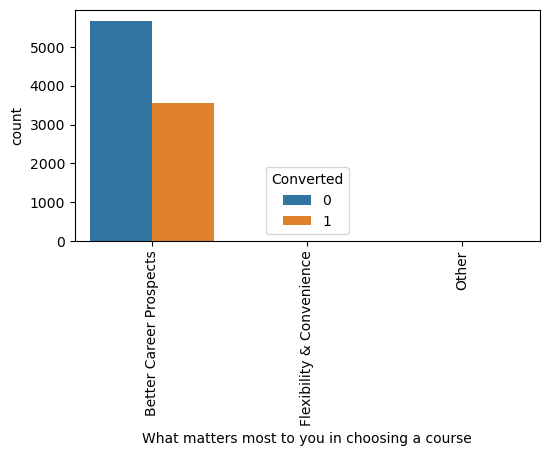

In [62]:
# Plotting countplot

plt.figure(figsize=(6,3))
c_plot=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.show()

In [66]:
# The column 'What matters most to you in choosing a course' can be dropped as it has only one option

drop_col_list = ['What matters most to you in choosing a course']

In [63]:
# Checking value counts for 'What is your current occupation' variable

lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [64]:
# Replace Null values with Unemployed

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

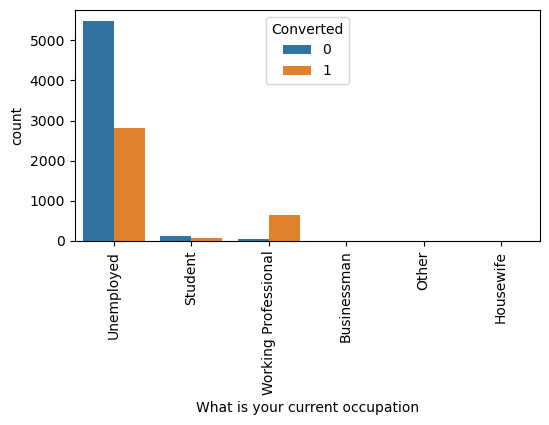

In [65]:
# Plotting countplot

plt.figure(figsize=(6,3))
c_plot=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.show()

#### Observation:

Conversion rate is higher for Working professionals while more number of Unemployed applicants apply for course even though Conversion rate is not high.

In [67]:
# Checking value counts of Tags column

lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [68]:
# Replace Null values with Not Available

lead_df['Tags'] = lead_df['Tags'].replace(np.nan,"Not Available")

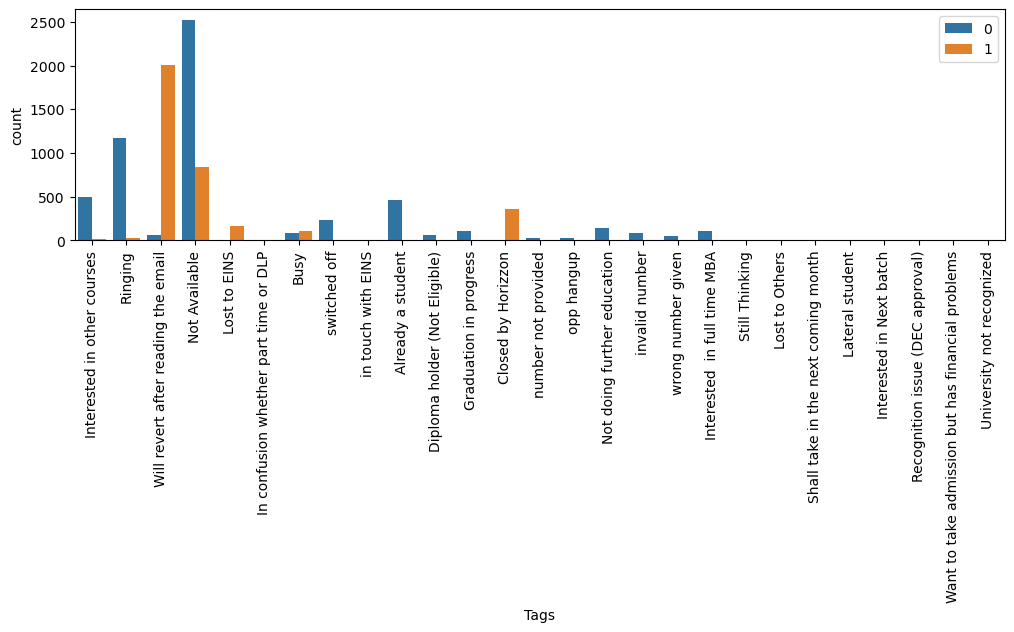

In [74]:
# Plotting countplot

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df["Tags"], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.legend(loc='upper right')
plt.show()

In [77]:
# Checking value counts of 'Lead Source' column

lead_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Looking at the values, we will do the following:
1. Merge 'Google' and 'google'
2. Merge 'Facebook' and 'Social Media'
3. Replace Null with 'Not Available'

In [79]:
lead_df["Lead Source"] = lead_df["Lead Source"].replace(np.nan,"Not Available")
lead_df["Lead Source"] = lead_df["Lead Source"].replace("google","Google")
lead_df["Lead Source"] = lead_df["Lead Source"].replace("Facebook","Social Media")

In [81]:
lead_df["Lead Source"].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           57
Not Available          36
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

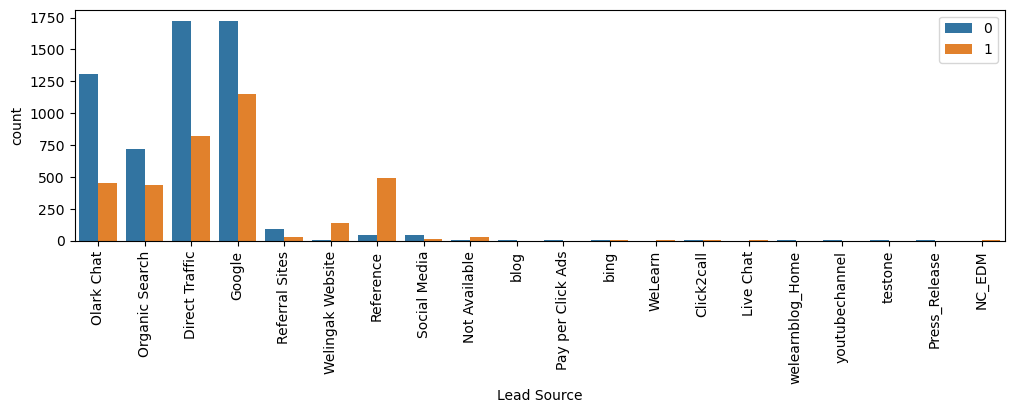

In [82]:
# Plotting countplot

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df["Lead Source"], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.legend(loc='upper right')
plt.show()

#### Observation:

1. Google and Direct traffic have the highest leads.
2. Conversion Rate of reference and welingak website is high.

In [84]:
# Checking value counts of 'Last Activity' column

lead_df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [85]:
# Replace Null values with 'Not Available'

lead_df["Last Activity"] = lead_df["Last Activity"].replace(np.nan,"Not Available")

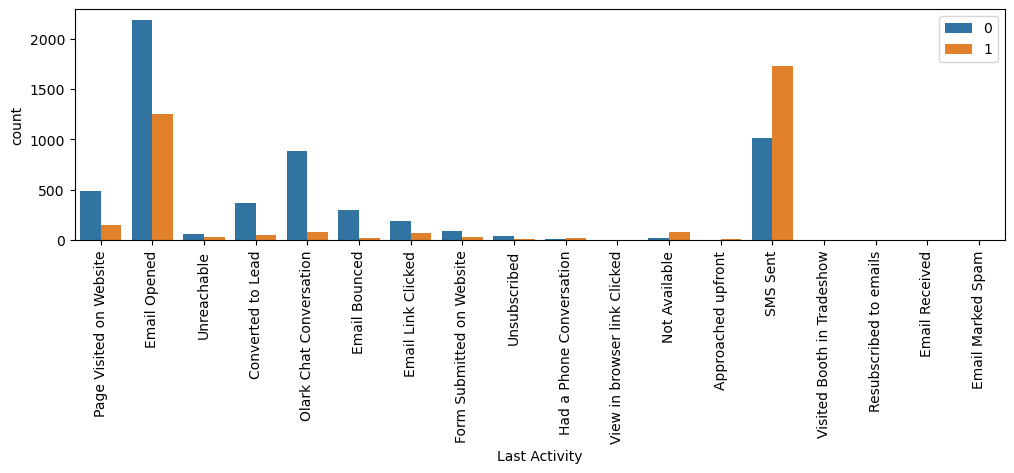

In [86]:
# Plotting countplot

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df["Last Activity"], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.legend(loc='upper right')
plt.show()

In [87]:
# Checking value counts of 'Lead Origin' column
lead_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

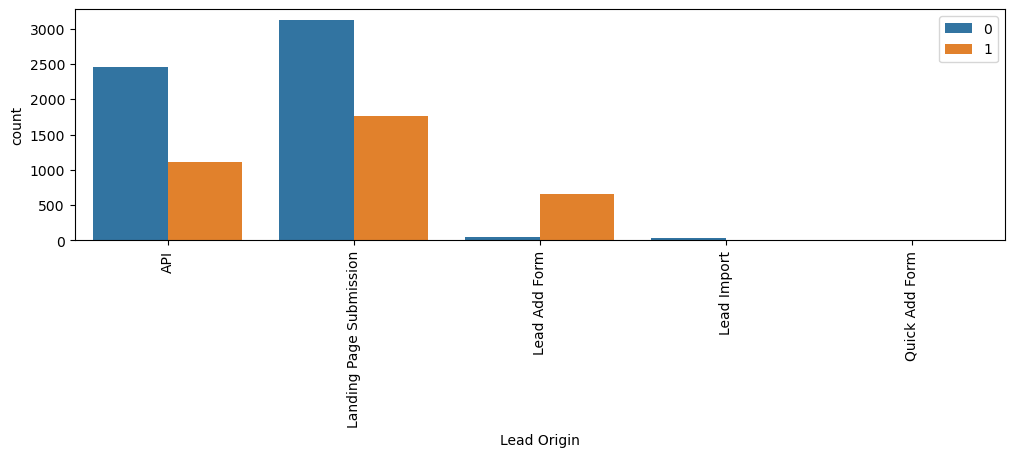

In [88]:
# Plotting countplot

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df["Lead Origin"], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.legend(loc='upper right')
plt.show()

In [106]:
# Checking value counts of last Notable Activity

lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

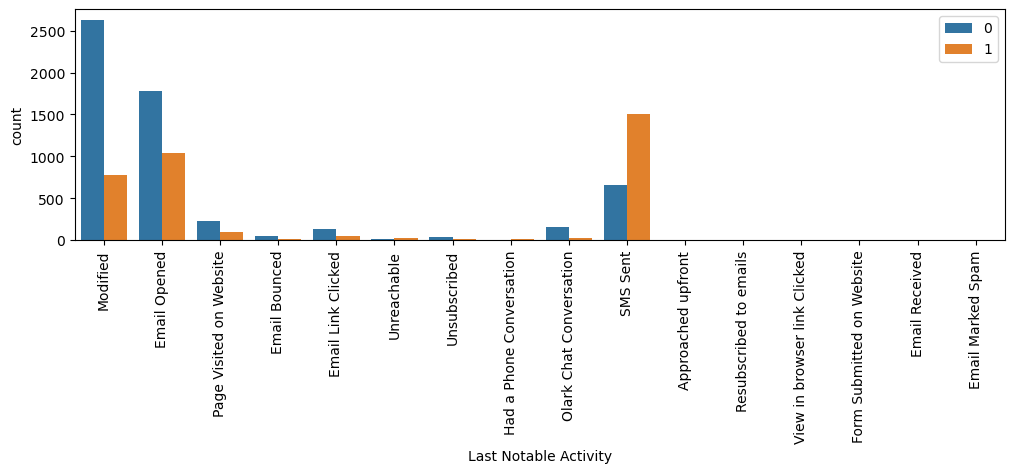

In [107]:
# Plotting countplot

plt.figure(figsize=(12,3))
c_plot=sns.countplot(lead_df["Last Notable Activity"], hue=lead_df.Converted)
c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
plt.legend(loc='upper right')
plt.show()

#### Observation:

1. API and Landing Landing Page Submission bring higher number of leads.
2. Lead Add Form has a high conversion rate even though count of leads is not high.

In [96]:
# Checking value counts for remaining categorical columns

col_list = ['Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
           'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

for col in col_list:
    print("\t")
    print("Value count for variable: ",col)
    print("\t")
    print(lead_df[col].value_counts(dropna=False))

	
Value count for variable:  Do Not Call
	
No     9238
Yes       2
Name: Do Not Call, dtype: int64
	
Value count for variable:  Do Not Email
	
No     8506
Yes     734
Name: Do Not Email, dtype: int64
	
Value count for variable:  Search
	
No     9226
Yes      14
Name: Search, dtype: int64
	
Value count for variable:  Magazine
	
No    9240
Name: Magazine, dtype: int64
	
Value count for variable:  Newspaper Article
	
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
	
Value count for variable:  X Education Forums
	
No     9239
Yes       1
Name: X Education Forums, dtype: int64
	
Value count for variable:  Newspaper
	
No     9239
Yes       1
Name: Newspaper, dtype: int64
	
Value count for variable:  Digital Advertisement
	
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
	
Value count for variable:  Through Recommendations
	
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
	
Value count for variable:  Receive More Updates About Our Courses
	


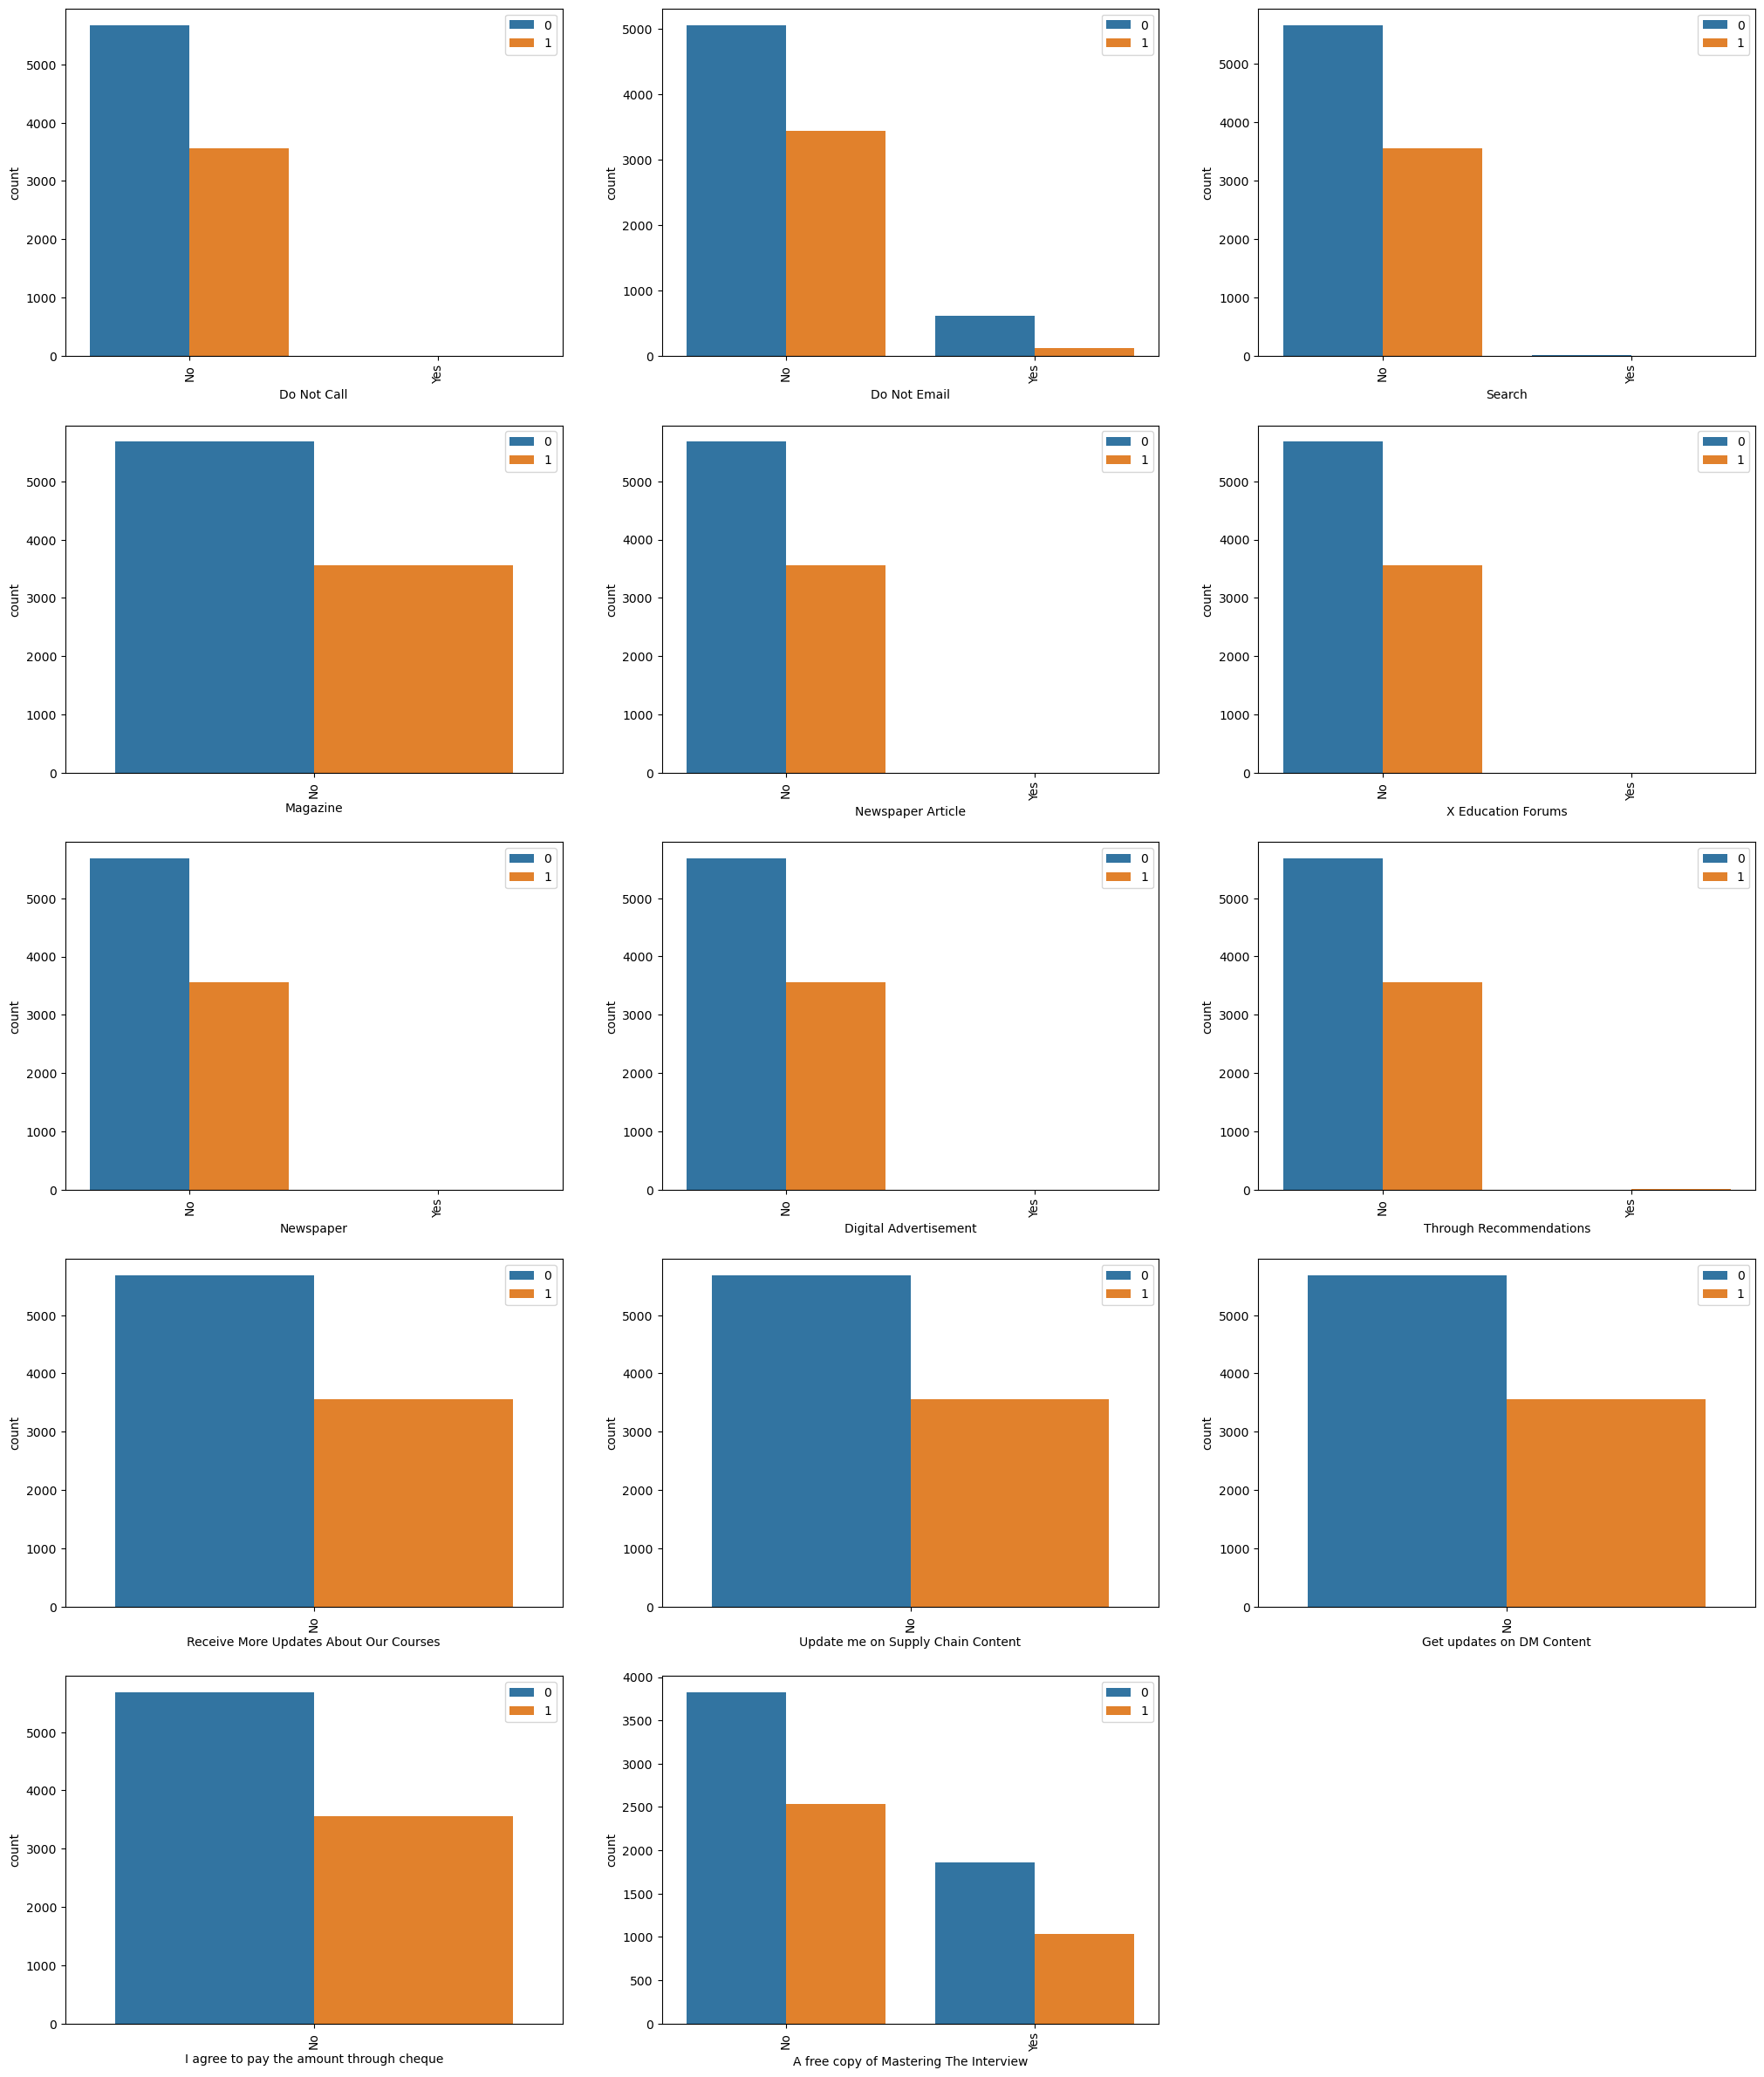

In [100]:
# Plotting countplots for the columns

plt.figure(figsize=[25,30])
i=1
for col in col_list:
    plt.subplot(5,3,i)
    c_plot=sns.countplot(lead_df[col], hue=lead_df.Converted)
    c_plot.set_xticklabels(c_plot.get_xticklabels(),rotation=90)
    plt.legend(loc='upper right')
    i+=1
plt.show()

We will add the below columns to the drop list as they have predominantly have only 1 value:

1. Do Not Call
2. Search
3. Magazine
4. Newspaper Article
5. X Education Forums
6. Newspaper
7. Digital Advertisement
8. Through Recommendations
9. Receive More Updates About Our Courses
10. Update me on Supply Chain Content
11. Get updates on DM Content
12. I agree to pay the amount through cheque

In [103]:
col_list.remove('Do Not Email')
col_list.remove('A free copy of Mastering The Interview')

ValueError: list.remove(x): x not in list

In [104]:
print(col_list)
print("\t")
print(len(col_list))

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
	
12


In [109]:
# Adding the list of columns to the drop list

for col in col_list:
    drop_col_list.append(col)
print(drop_col_list)

['What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [115]:
# dropping the columns from the data frame

lead_df = lead_df.drop(drop_col_list,1)
lead_df.shape

(9240, 14)

In [116]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### Numerical Variable Analysis:

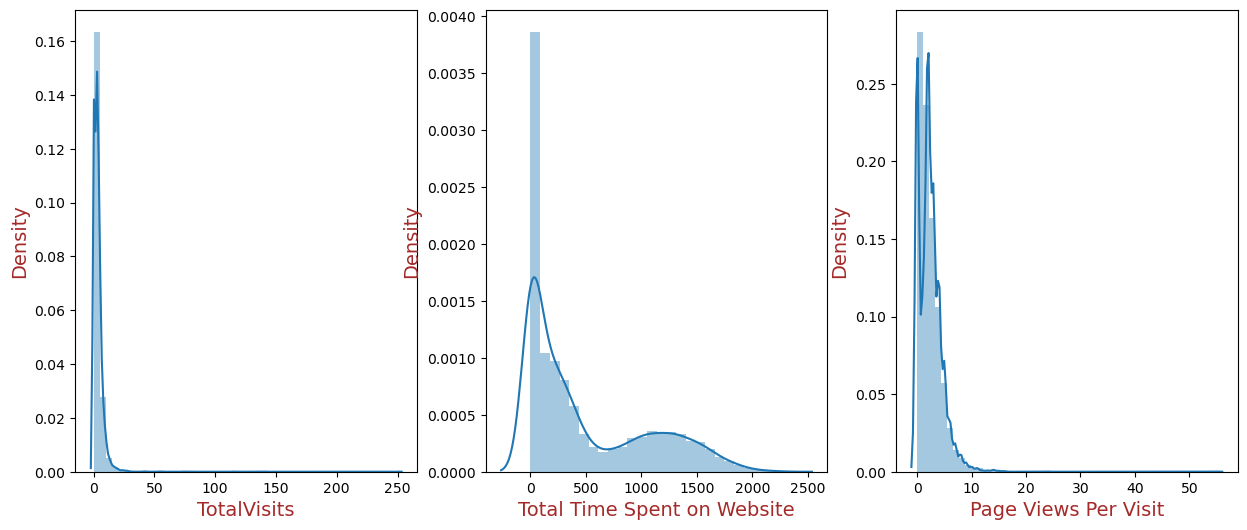

In [122]:
# Plotting Distplot for numerical columns

num_col_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=[15,6]) # setting the figure size
i=1 # plot position

for col in num_col_list:
    plt.subplot(1,3,i)
    plt.xlabel(col,fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("Density",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
    sns.distplot(lead_df[col])
    i+=1
plt.show()

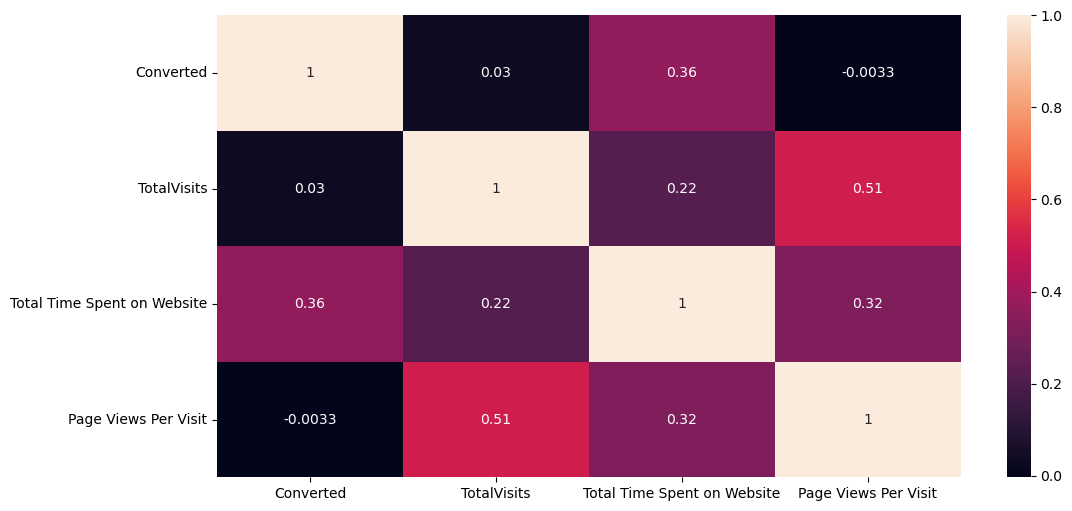

In [124]:
# Check the correlation among varibles

plt.figure(figsize=(12,6))
sns.heatmap(lead_df.corr(), annot=True)
plt.show()

#### Outlier Analysis & Treatment:

In [128]:
# Getting the percentile values for numeric variables

lead_df[num_col_list].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


Observation:

Last 1% data has outliers

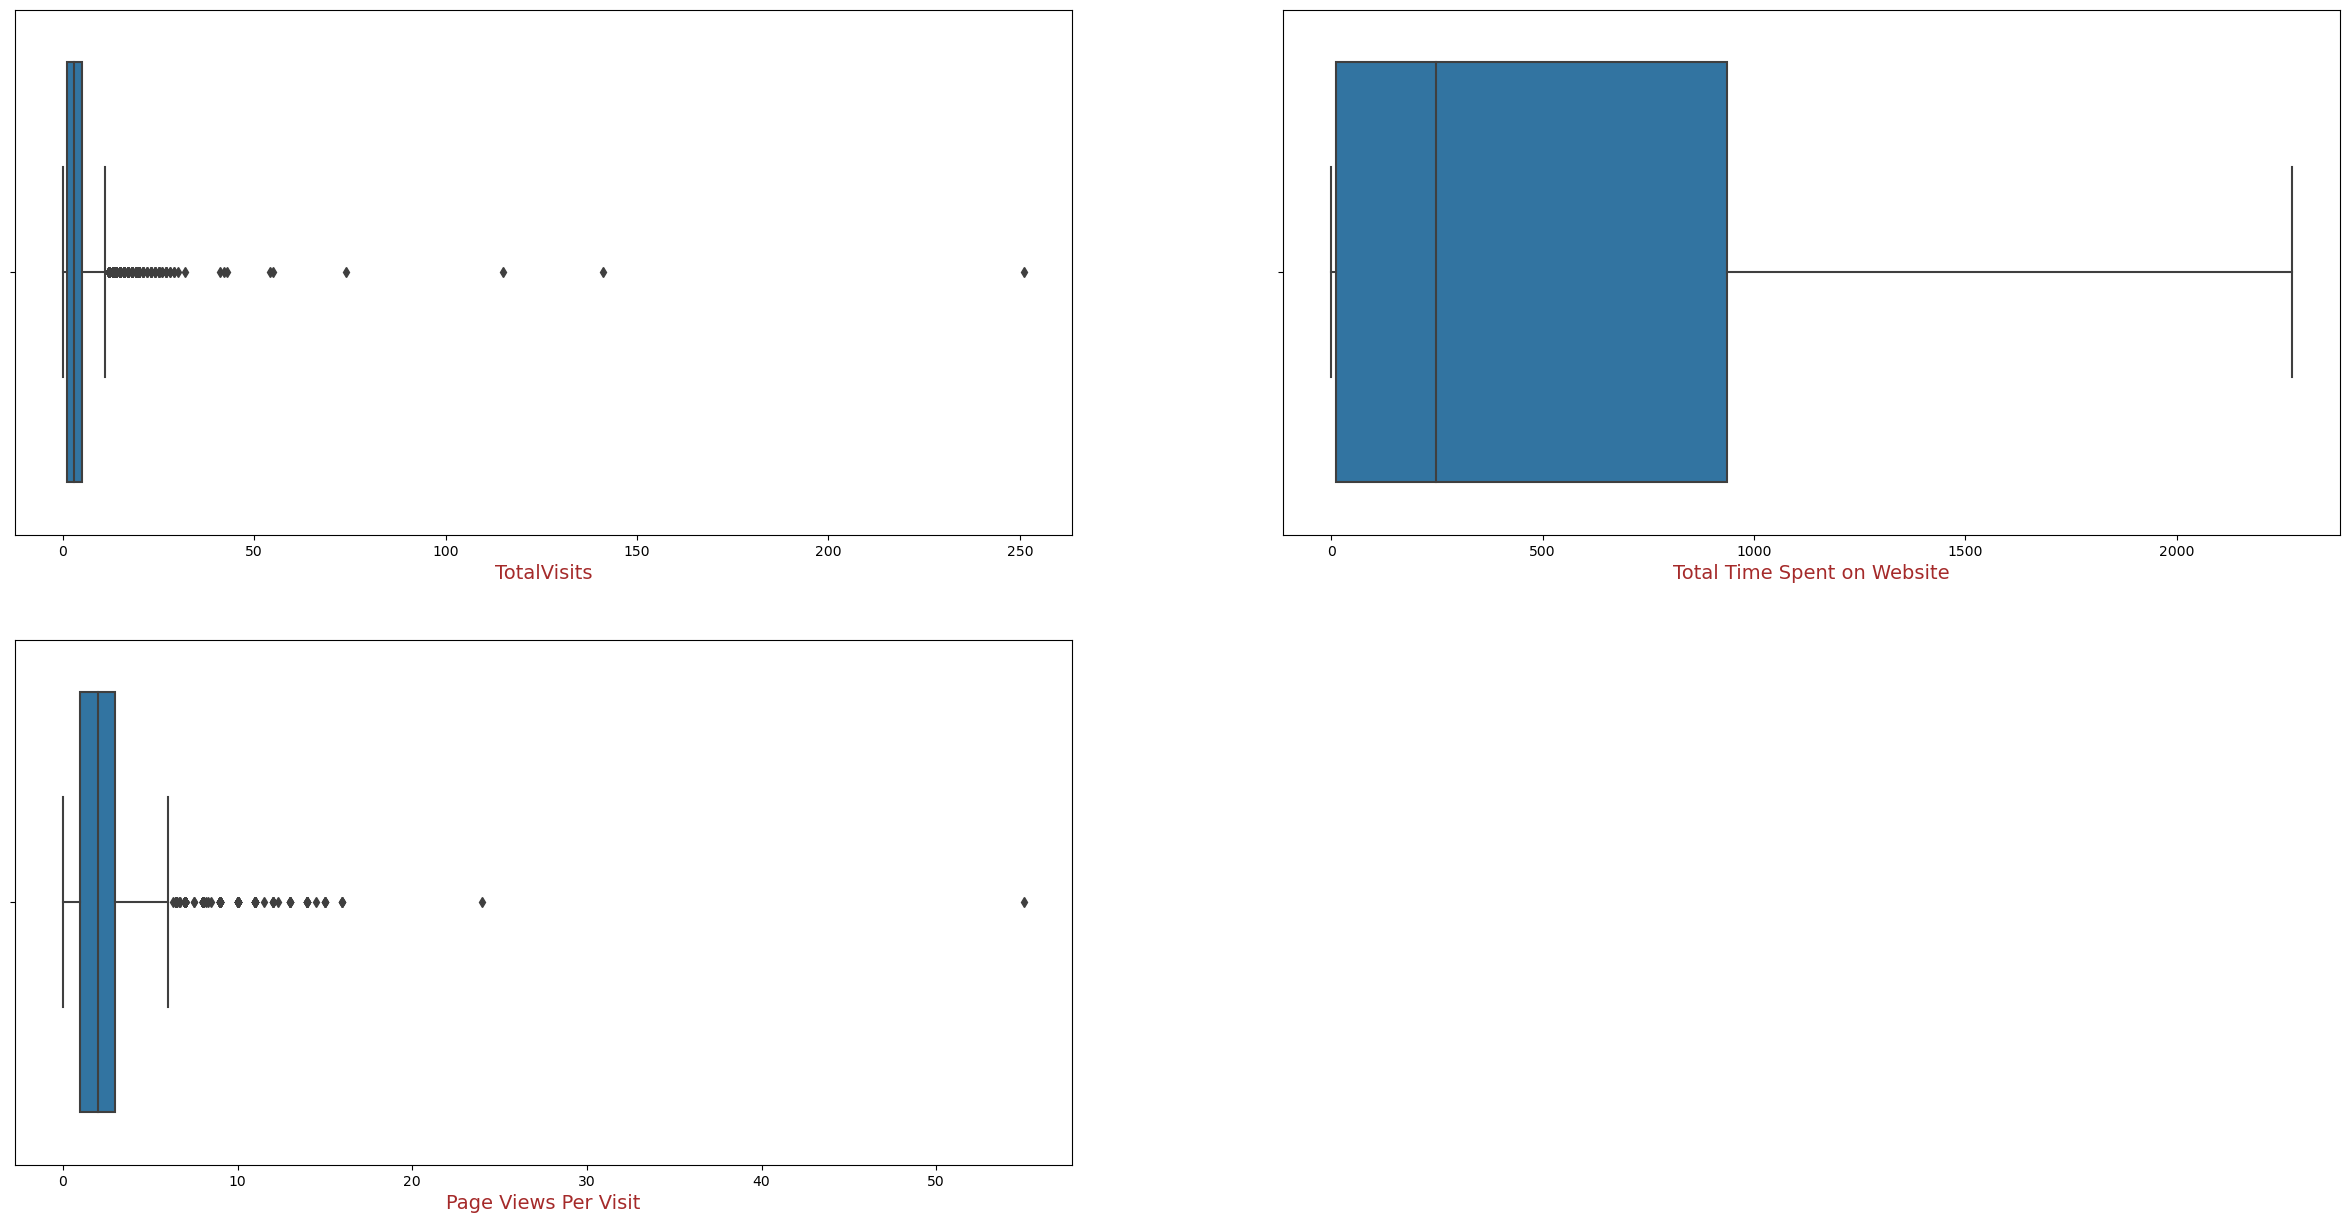

In [135]:
# Plotting boxplots for visual representation

plt.figure(figsize=[30,15]) # setting the figure size
i=1 # plot position

for col in num_col_list:
    plt.subplot(2,2,i)
    plt.xlabel(col,fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(lead_df[col])
    i+=1
plt.show()

In [136]:
# Outlier handling for TotalVisits

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

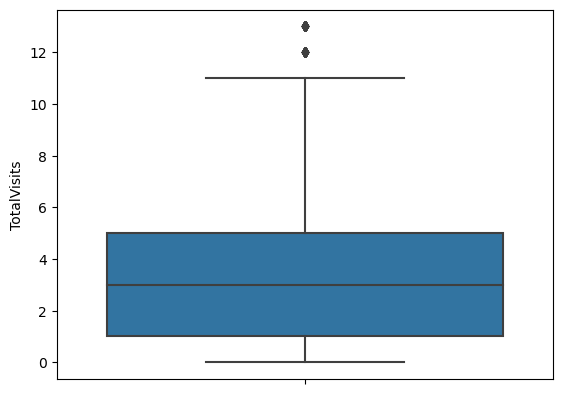

In [138]:
# Remove top and bottom 1% of values

Top = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Top)]
Bottom = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Bottom)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [139]:
# Outlier handling for Page Views Per Visit

lead_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8929.000000
mean        2.303194
std         1.993860
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

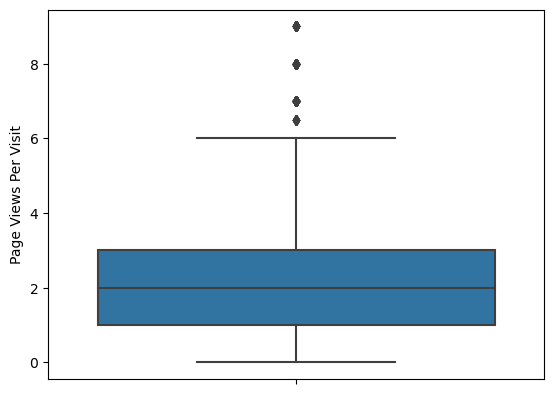

In [140]:
# Remove top and bottom 1% of values

Top = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[(lead_df['Page Views Per Visit'] <= Top)]
Bottom = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[(lead_df['Page Views Per Visit'] >= Bottom)]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

In [141]:
# Shape of the dataframe post cleanup

lead_df.shape

(8878, 14)

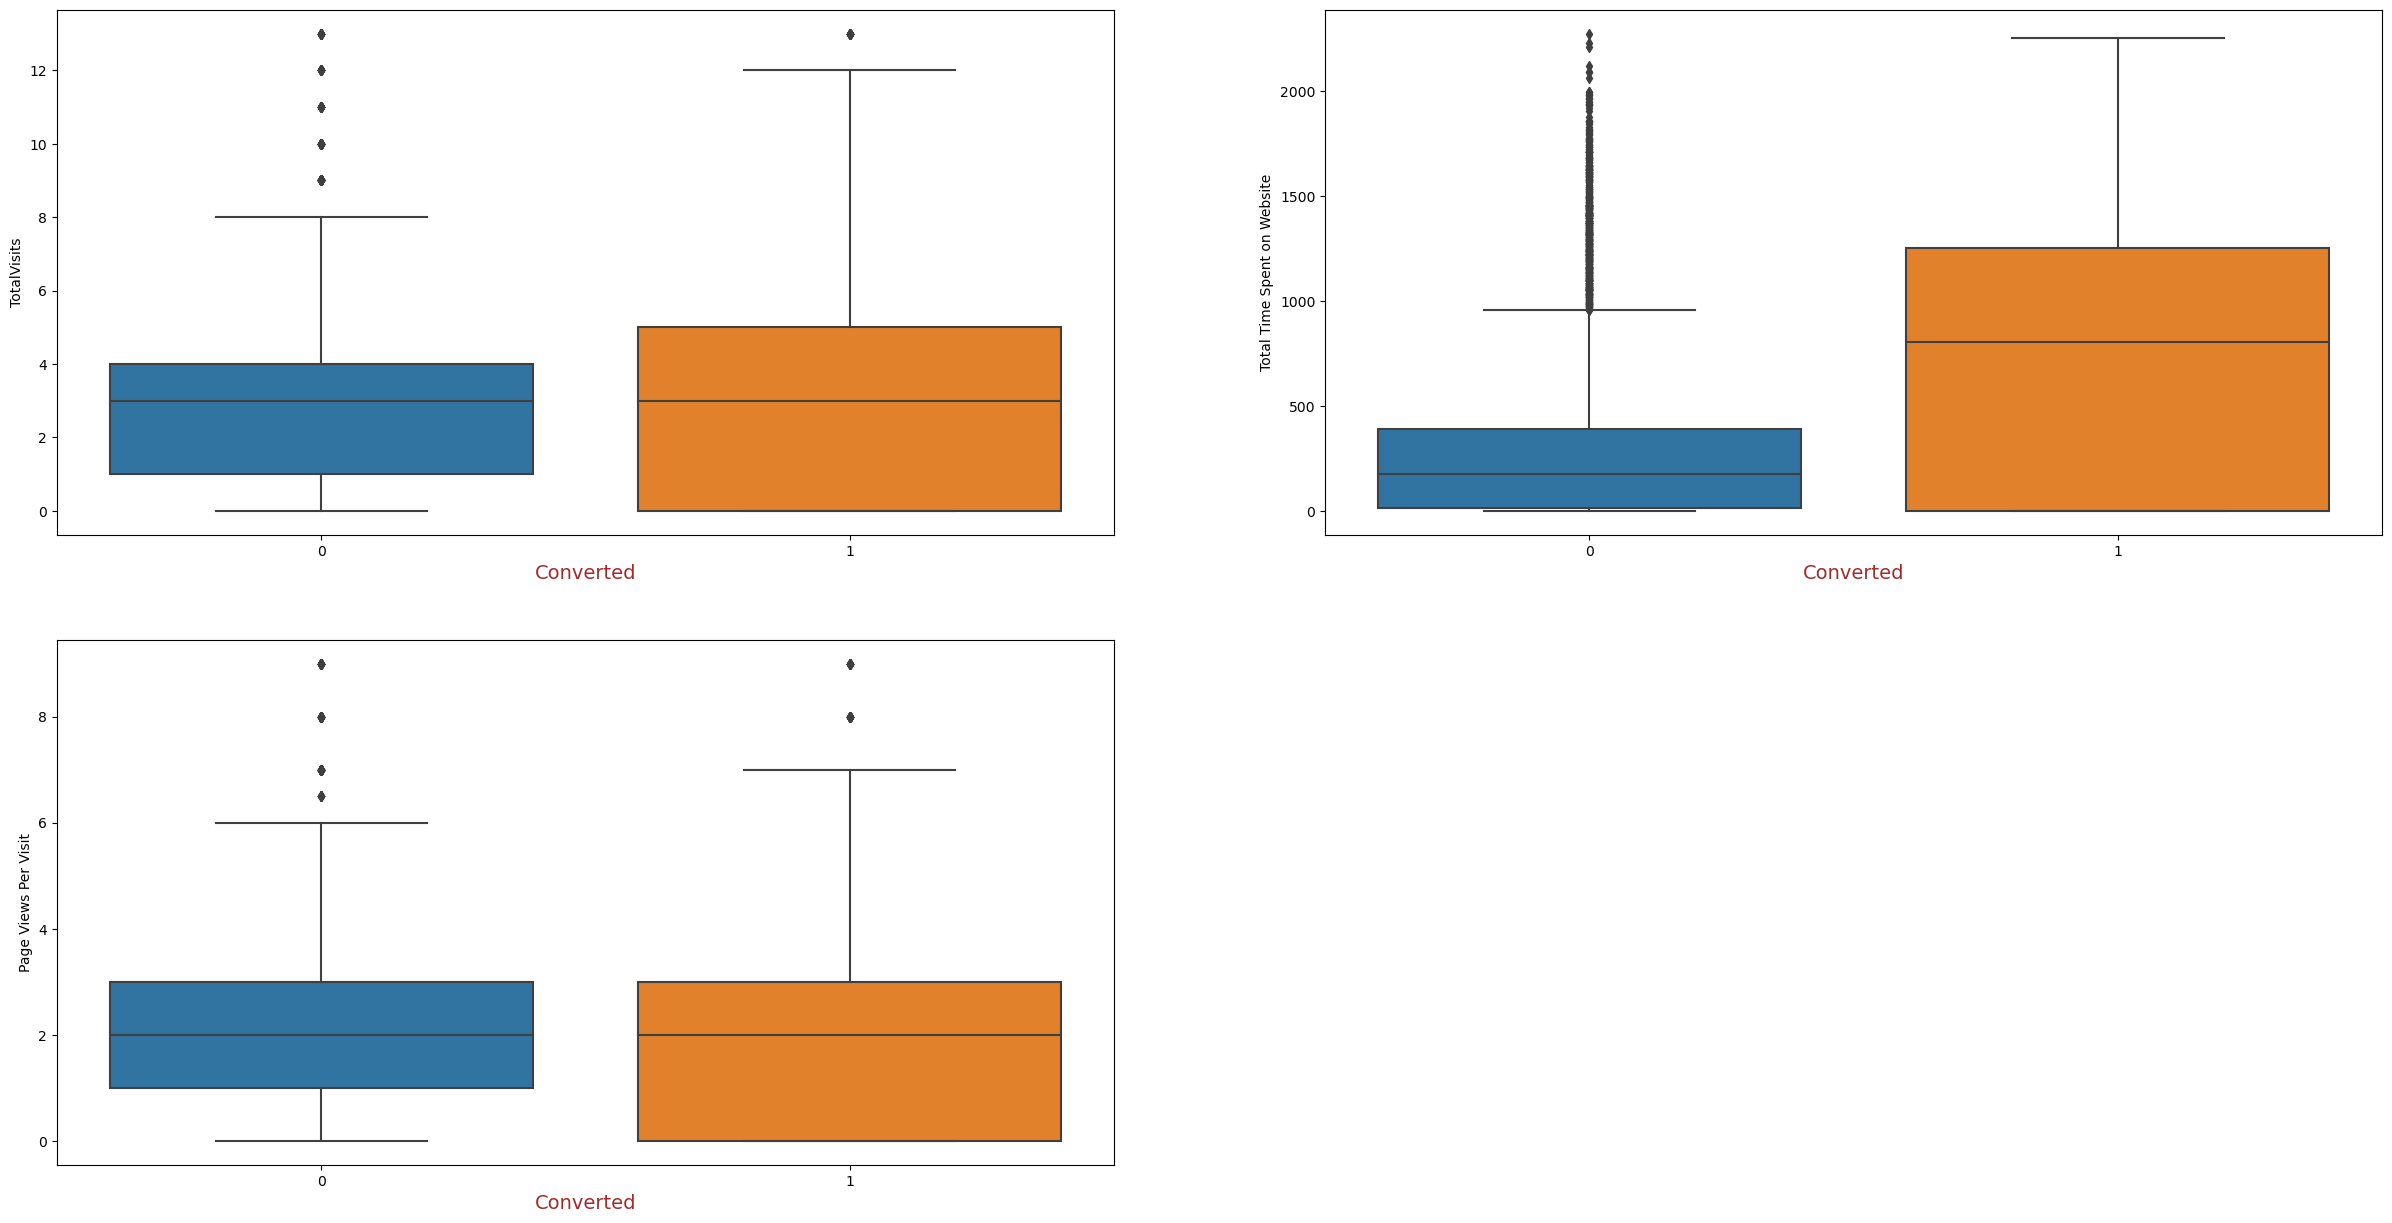

In [143]:
# Checking pattern on numerical columns with Converted variable

plt.figure(figsize=[30,15]) # setting the figure size
i=1 # plot position

for col in num_col_list:
    plt.subplot(2,2,i)
    plt.xlabel(col,fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(y = col, x = 'Converted', data = lead_df)
    i+=1
plt.show()

#### Observations:

1. More time spent on the website have better conversions.
2. Websites should be enabled in such a way that leads spend more time, thus having a higher probability of getting converted.

## Step 4: Dummy Variable creation for categorical columns

In [144]:
# Fetch list of categorical columns

cat_col_list = lead_df.select_dtypes(include=['object']).columns
cat_col_list

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [145]:
# Take a backup of the df before proceeding further
lead_df_cp = lead_df.copy()
lead_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8878 non-null   object 
 1   Lead Source                             8878 non-null   object 
 2   Do Not Email                            8878 non-null   object 
 3   Converted                               8878 non-null   int64  
 4   TotalVisits                             8878 non-null   float64
 5   Total Time Spent on Website             8878 non-null   int64  
 6   Page Views Per Visit                    8878 non-null   float64
 7   Last Activity                           8878 non-null   object 
 8   Specialization                          8878 non-null   object 
 9   What is your current occupation         8878 non-null   object 
 10  Tags                                    8878 non-null   obje

In [159]:
# Converting Yes/No to 0/1 for A free copy of Mastering The Interview','Do Not Email' columns

bin_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function

def bin_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function 

lead_df[bin_list] = lead_df[bin_list].apply(bin_map)

In [160]:
# Create dummy variables using the 'get_dummies' and drop the first column

dummy_var = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation', 'City','Specialization','Lead Source',
                                   'Last Activity','Last Notable Activity','Tags']], drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [161]:
# Concat the results to a new dataframe along with the master df

lead_df_new = pd.concat([lead_df, dummy_var], axis=1)
lead_df_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Available,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [162]:
# Dropping the original columns after dummy variable creation

lead_df_new.drop(cat_col_list,axis=1,inplace = True)

In [163]:
lead_df_new.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step 5: Test-Train Split & Logistic Regression Model Building

In [164]:
#Dropping the target variable in X
X = lead_df_new.drop(['Converted'], axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [165]:
# Putting target variable in y

y = lead_df_new['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [166]:
# Splitting the data into train and test ( 70% for train and 30% for test)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling of Numeric Data

In [167]:
num_col_list = X_train.select_dtypes(include=['float64', 'int64']).columns
num_col_list

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [170]:
scaler = StandardScaler()
X_train[num_col_list] = scaler.fit_transform(X_train[num_col_list])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1233,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6078,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6404,-0.010992,-0.743835,0.402109,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4409,-1.130693,-0.871154,-1.193107,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1927,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Model Building

In [176]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6112
Model Family:                Binomial   Df Model:                          101
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Oct 2023   Deviance:                       45775.
Time:                        02:48:31   Pearson chi2:                 2.24e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.723e+15   9.87e+07   3.77e+07      0.000    3.72e+15    3.72e+15
TotalVisits                                            -2.199e+13   1.42e+06  -1.55e+07      0.000    -2.2e+13    -2.2e+13
Total Time Spent on Website                             2.744e+14   1.04e+06   2.64e+08      0.000    2.74e+14    2.74e+14
Page Views Per Visit                                   -1.168e+13   1.51e+06  -7.73e+06      0.000   -1.17e+13   -1.17e+13
Lead Origin_Landing Page Submission                     1.671e+14   3.49e+06   4.79e+07      0.000    1.67e+14    1.67e+14
Lead Origin_Lead Add Form                              -5.117e+14    3.6e+07  -1.42e+07      0.000   -5.12e+14   -5.12e+14
Lead Origin_Lead Import                                 8.413e+14   4.26e+07   1.98e+07      0.000    8.41e+14    8.41e+14
What is your current occupation_Housewife               3.676e+15   4.61e+07   7.98e+07      0.000    3.68e+15    3.68e+15
What is your current occupation_Other                  -2.348e+14   4.62e+07  -5.08e+06      0.000   -2.35e+14   -2.35e+14
What is your current occupation_Student                 5.233e+14   3.99e+07   1.31e+07      0.000    5.23e+14    5.23e+14
What is your current occupation_Unemployed              3.777e+14   3.94e+07   9.58e+06      0.000    3.78e+14    3.78e+14
What is your current occupation_Working Professional    4.097e+14   3.96e+07   1.03e+07      0.000     4.1e+14     4.1e+14
City_Other Cities                                      -4.855e+13   3.49e+06  -1.39e+07      0.000   -4.86e+13   -4.86e+13
City_Other Cities of Maharashtra                       -1.131e+13   4.17e+06  -2.71e+06      0.000   -1.13e+13   -1.13e+13
City_Other Metro Cities                                 2.658e+13   4.55e+06   5.85e+06      0.000    2.66e+13    2.66e+13
City_Thane & Outskirts                                 -4.218e+12   3.34e+06  -1.26e+06      0.000   -4.22e+12   -4.22e+12
City_Tier II Cities                                     1.494e+14   9.48e+06   1.58e+07      0.000    1.49e+14    1.49e+14
Specialization_Business Administration                  1.303e+14    6.3e+06   2.07e+07      0.000     1.3e+14     1.3e+14
Specialization_E-Business                              -2.669e+14   1.22e+07  -2.19e+07      0.000   -2.67e+14   -2.67e+14
Specialization_E-COMMERCE                                2.38e+14    9.5e+06    2.5e+07      0.000    2.38e+14    2.38e+14
Specialization_Finance Management                       2.111e+12   5.47e+06   3.86e+05      0.000    2.11e+12    2.11e+12
Specialization_Healthcare Management                    8.955e+13   7.99e+06   1.12e+07      0.000    8.95e+13    8.95e+13
Speciali

In [171]:
# Logistic regression model & Feature Selection Using RFE

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [172]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True])

In [173]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 49),
 ('What is your current occupation_Housewife', False, 29),
 ('What is your current occupation_Other', False, 80),
 ('What is your current occupation_Student', False, 33),
 ('What is your current occupation_Unemployed', False, 46),
 ('What is your current occupation_Working Professional', False, 17),
 ('City_Other Cities', False, 68),
 ('City_Other Cities of Maharashtra', False, 69),
 ('City_Other Metro Cities', False, 70),
 ('City_Thane & Outskirts', False, 86),
 ('City_Tier II Cities', False, 47),
 ('Specialization_Business Administration', False, 67),
 ('Specialization_E-Business', False, 65),
 ('Specialization_E-COMMERCE', False, 78),
 ('Specialization_Finance Management', False, 41),
 ('Specialization_Healthcare Management', False, 37),
 (

In [174]:
col = X_train.columns[rfe.support_]

In [175]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       '

In [177]:
# Building 1st Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.0
Date:                Sat, 14 Oct 2023   Deviance:                       2743.9
Time:                        02:49:47   Pearson chi2:                 8.61e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5867
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4018      0.224    -15.157      0.000      -3.842      -2.962
Lead Source_Welingak Website                25.3135   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Last Activity_SMS Sent                       2.1447      0.109     19.629      0.000       1.931       2.359
Last Notable Activity_Modified              -1.6717      0.120    -13.955      0.000      -1.906      -1.437
Tags_Busy                                    2.5846      0.306      8.434      0.000       1.984       3.185
Tags_Closed by Horizzon                      9.7664      1.031      9.472      0.000       7.746      11.787
Tags_Interested in Next batch               26.8232   9.66e+04      0.000      1.000   -1.89e+05    1.89e+05
Tags_Lateral student                        27.8969   1.47e+05      0.000      1.000   -2.88e+05    2.88e+05
Tags_Lost to EINS                            8.0288      0.635     12.648      0.000       6.785       9.273
Tags_Not Available                           2.0118      0.229      8.792      0.000       1.563       2.460
Tags_Ringing                                -1.2611      0.313     -4.023      0.000      -1.875      -0.647
Tags_Will revert after reading the email     6.7707      0.278     24.349      0.000       6.226       7.316
Tags_in touch with EINS                      3.1566      0.897      3.518      0.000       1.398       4.915
Tags_invalid number                         -1.7488      1.047     -1.670      0.095      -3.801       0.304
Tags_switched off                           -2.2934      0.753     -3.044      0.002      -3.770      -0.817
Tags_wrong number given                    -23.3001   3.28e+04     -0.001      0.999   -6.43e+04    6.43e+04
============================================================================================================
"""

In [178]:
# High p-value for "Lead Source_Welingak Website" and hence dropping it

col = col.drop('Lead Source_Welingak Website',1)

In [179]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6199
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.9
Date:                Sat, 14 Oct 2023   Deviance:                       2841.9
Time:                        02:51:34   Pearson chi2:                 9.08e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5801
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3996      0.225    -15.133      0.000      -3.840      -2.959
Last Activity_SMS Sent                       2.1954      0.107     20.519      0.000       1.986       2.405
Last Notable Activity_Modified              -1.7319      0.118    -14.674      0.000      -1.963      -1.501
Tags_Busy                                    2.5621      0.308      8.332      0.000       1.959       3.165
Tags_Closed by Horizzon                      9.8614      1.031      9.564      0.000       7.840      11.882
Tags_Interested in Next batch               25.7703   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                        26.8891   8.89e+04      0.000      1.000   -1.74e+05    1.74e+05
Tags_Lost to EINS                            8.1166      0.635     12.785      0.000       6.872       9.361
Tags_Not Available                           2.1013      0.229      9.187      0.000       1.653       2.550
Tags_Ringing                                -1.3036      0.314     -4.158      0.000      -1.918      -0.689
Tags_Will revert after reading the email     6.8032      0.279     24.393      0.000       6.257       7.350
Tags_in touch with EINS                      3.1620      0.901      3.508      0.000       1.395       4.929
Tags_invalid number                         -1.7927      1.048     -1.711      0.087      -3.846       0.261
Tags_switched off                           -2.3392      0.753     -3.105      0.002      -3.816      -0.862
Tags_wrong number given                    -22.3337   1.98e+04     -0.001      0.999   -3.88e+04    3.87e+04
============================================================================================================
"""

In [181]:
# High p-value for Tags_Interested in Next batch and hence dropping it

col = col.drop('Tags_Interested in Next batch',1)

In [182]:
# Building 3rd Model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6200
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.9
Date:                Sat, 14 Oct 2023   Deviance:                       2855.8
Time:                        02:53:03   Pearson chi2:                 9.16e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5791
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2367      0.206    -15.725      0.000      -3.640      -2.833
Last Activity_SMS Sent                       2.2280      0.107     20.852      0.000       2.019       2.437
Last Notable Activity_Modified              -1.7500      0.118    -14.831      0.000      -1.981      -1.519
Tags_Busy                                    2.3828      0.294      8.100      0.000       1.806       2.959
Tags_Closed by Horizzon                      9.7136      1.027      9.455      0.000       7.700      11.727
Tags_Lateral student                        25.7077   5.39e+04      0.000      1.000   -1.06e+05    1.06e+05
Tags_Lost to EINS                            7.9681      0.629     12.673      0.000       6.736       9.200
Tags_Not Available                           1.9305      0.210      9.191      0.000       1.519       2.342
Tags_Ringing                                -1.4932      0.300     -4.982      0.000      -2.081      -0.906
Tags_Will revert after reading the email     6.6460      0.264     25.138      0.000       6.128       7.164
Tags_in touch with EINS                      2.9966      0.899      3.333      0.001       1.235       4.759
Tags_invalid number                         -1.9833      1.044     -1.900      0.057      -4.029       0.062
Tags_switched off                           -2.5310      0.748     -3.384      0.001      -3.997      -1.065
Tags_wrong number given                    -21.5217    1.2e+04     -0.002      0.999   -2.35e+04    2.34e+04
============================================================================================================
"""

In [183]:
# High p-value for "Tags_Lateral student" , hence dropping it

col = col.drop('Tags_Lateral student',1)

In [184]:
# Building 4th Model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1432.0
Date:                Sat, 14 Oct 2023   Deviance:                       2863.9
Time:                        02:54:26   Pearson chi2:                 9.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5786
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1759      0.200    -15.906      0.000      -3.567      -2.785
Last Activity_SMS Sent                       2.2404      0.107     20.990      0.000       2.031       2.450
Last Notable Activity_Modified              -1.7449      0.118    -14.825      0.000      -1.976      -1.514
Tags_Busy                                    2.3137      0.290      7.979      0.000       1.745       2.882
Tags_Closed by Horizzon                      9.6481      1.026      9.403      0.000       7.637      11.659
Tags_Lost to EINS                            7.9024      0.627     12.610      0.000       6.674       9.131
Tags_Not Available                           1.8639      0.204      9.140      0.000       1.464       2.264
Tags_Ringing                                -1.5645      0.295     -5.295      0.000      -2.144      -0.985
Tags_Will revert after reading the email     6.5814      0.260     25.360      0.000       6.073       7.090
Tags_in touch with EINS                      2.9307      0.898      3.263      0.001       1.171       4.691
Tags_invalid number                         -2.0551      1.043     -1.971      0.049      -4.099      -0.012
Tags_switched off                           -2.6031      0.746     -3.489      0.000      -4.065      -1.141
Tags_wrong number given                    -21.5930    1.2e+04     -0.002      0.999   -2.35e+04    2.34e+04
============================================================================================================
"""

In [185]:
# Dropping "Tags_wrong number given" as it has p value > .05

col = col.drop('Tags_wrong number given',1)

In [186]:
# Building 5th Model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6202
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.8
Date:                Sat, 14 Oct 2023   Deviance:                       2873.6
Time:                        02:56:26   Pearson chi2:                 9.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5779
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3332      0.201    -16.565      0.000      -3.728      -2.939
Last Activity_SMS Sent                       2.2116      0.106     20.895      0.000       2.004       2.419
Last Notable Activity_Modified              -1.7298      0.117    -14.731      0.000      -1.960      -1.500
Tags_Busy                                    2.4857      0.289      8.605      0.000       1.920       3.052
Tags_Closed by Horizzon                      9.7929      1.027      9.539      0.000       7.781      11.805
Tags_Lost to EINS                            8.0478      0.628     12.822      0.000       6.818       9.278
Tags_Not Available                           2.0284      0.204      9.930      0.000       1.628       2.429
Tags_Ringing                                -1.3835      0.294     -4.711      0.000      -1.959      -0.808
Tags_Will revert after reading the email     6.7341      0.261     25.797      0.000       6.222       7.246
Tags_in touch with EINS                      3.0905      0.897      3.447      0.001       1.333       4.848
Tags_invalid number                         -1.8732      1.042     -1.798      0.072      -3.915       0.169
Tags_switched off                           -2.4202      0.745     -3.247      0.001      -3.881      -0.959
============================================================================================================
"""

In [187]:
# Dropping "Tags_invalid number" as it has p-value > .05

col = col.drop('Tags_invalid number',1)

In [188]:
# Building 6th Model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.6
Date:                Sat, 14 Oct 2023   Deviance:                       2879.1
Time:                        02:57:52   Pearson chi2:                 9.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5776
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4785      0.199    -17.443      0.000      -3.869      -3.088
Last Activity_SMS Sent                       2.1911      0.105     20.825      0.000       1.985       2.397
Last Notable Activity_Modified              -1.7176      0.117    -14.648      0.000      -1.947      -1.488
Tags_Busy                                    2.6412      0.286      9.242      0.000       2.081       3.201
Tags_Closed by Horizzon                      9.9279      1.027      9.670      0.000       7.916      11.940
Tags_Lost to EINS                            8.1832      0.628     13.040      0.000       6.953       9.413
Tags_Not Available                           2.1784      0.202     10.810      0.000       1.783       2.573
Tags_Ringing                                -1.2216      0.290     -4.213      0.000      -1.790      -0.653
Tags_Will revert after reading the email     6.8754      0.260     26.435      0.000       6.366       7.385
Tags_in touch with EINS                      3.2369      0.895      3.618      0.000       1.483       4.991
Tags_switched off                           -2.2569      0.744     -3.035      0.002      -3.715      -0.799
============================================================================================================
"""

Since the p-values for all variables are < 0.05, we can check the Variance Inflation Factor (VIF) for any correlationship

In [189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Busy,1.04
3,Tags_Closed by Horizzon,1.04
9,Tags_switched off,1.04
4,Tags_Lost to EINS,1.03
8,Tags_in touch with EINS,1.00
5,Tags_Not Available,0.15
1,Last Notable Activity_Modified,0.11
7,Tags_Will revert after reading the email,0.10
0,Last Activity_SMS Sent,0.09
6,Tags_Ringing,0.08


There are no correlations observed as VIF is < 5 for all variables

## Step 6: Creating Prediction on Train set

In [190]:
# Getting predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1233    0.046636
6078    0.046636
6404    0.216305
4409    0.009013
1927    0.979578
1969    0.709108
7413    0.214151
7097    0.009013
327     0.967607
6215    0.046636
dtype: float64

In [191]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04663553, 0.04663553, 0.21630522, 0.00901292, 0.97957753,
       0.70910786, 0.214151  , 0.00901292, 0.96760747, 0.04663553])

In [192]:
# Predicting conversion rate based on prospect id

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID
0,0,0.046636,1233
1,0,0.046636,6078
2,0,0.216305,6404
3,0,0.009013,4409
4,1,0.979578,1927


In [193]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted
0,0,0.046636,1233,0
1,0,0.046636,6078,0
2,0,0.216305,6404,0
3,0,0.009013,4409,0
4,1,0.979578,1927,1


In [197]:
# Let's check the overall accuracy

from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9196974573543611


Model accuracy is very high (~92%) which shows accurate predictions

## Step 7: Metrics beyond simply accuracy

In [199]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3724  148]
 [ 351 1991]]


In [200]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8501280956447481

In [202]:
# Let us calculate specificity
TN / float(TN+FP)

0.9617768595041323

In [203]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038223140495867766


In [204]:
# positive predictive value 
print (TP / float(TP+FP))

0.9308087891538102


In [205]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9138650306748466


## Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [206]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [208]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

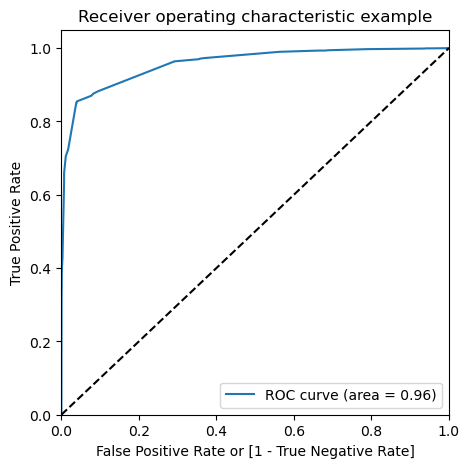

In [209]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

Since ROC value is close to 1 (0.96), we have a good predictive model.

## Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [210]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.046636,1233,0,1,0,0,0,0,0,0,0,0,0
1,0,0.046636,6078,0,1,0,0,0,0,0,0,0,0,0
2,0,0.216305,6404,0,1,1,1,0,0,0,0,0,0,0
3,0,0.009013,4409,0,1,0,0,0,0,0,0,0,0,0
4,1,0.979578,1927,1,1,1,1,1,1,1,1,1,1,1


In [211]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376891  1.000000  0.000000
0.1   0.1  0.804957  0.963706  0.708936
0.2   0.2  0.804957  0.963279  0.709194
0.3   0.3  0.901513  0.876174  0.916839
0.4   0.4  0.920341  0.854398  0.960227
0.5   0.5  0.919697  0.850128  0.961777
0.6   0.6  0.919537  0.849701  0.961777
0.7   0.7  0.919537  0.849701  0.961777
0.8   0.8  0.881880  0.705380  0.988636
0.9   0.9  0.866913  0.658412  0.993027


In [212]:
print(cm1[1,0])

800


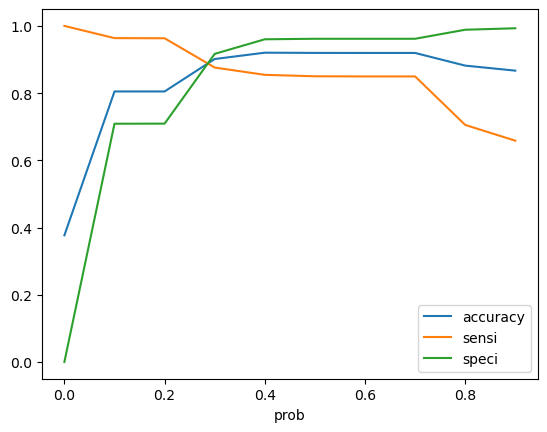

In [213]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [215]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.046636,1233,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.046636,6078,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.216305,6404,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.009013,4409,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.979578,1927,1,1,1,1,1,1,1,1,1,1,1,1


In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9015127132281944

In [217]:
# As per the requirement, assigning lead number for each of the prospected IDs based on conversion probability

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_prob.map( lambda x: round(x*100))
y_train_pred_final

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.046636,1233,0,1,0,0,0,0,0,0,0,0,0,0,5
1,0,0.046636,6078,0,1,0,0,0,0,0,0,0,0,0,0,5
2,0,0.216305,6404,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.009013,4409,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0.979578,1927,1,1,1,1,1,1,1,1,1,1,1,1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,0,0.046636,381,0,1,0,0,0,0,0,0,0,0,0,0,5
6210,0,0.001630,85,0,1,0,0,0,0,0,0,0,0,0,0,0
6211,0,0.046636,8383,0,1,0,0,0,0,0,0,0,0,0,0,5
6212,1,0.842818,7231,1,1,1,1,1,1,1,1,1,1,0,1,84


In [220]:
# Lets check the confusion matrix of the final model
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3550,  322],
       [ 290, 2052]], dtype=int64)

In [221]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [222]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8761742100768574

In [223]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.9168388429752066

In [225]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.08316115702479339


In [226]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8643639427127211


In [227]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9244791666666666


#### Precision and Recall

In [229]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3550,  322],
       [ 290, 2052]], dtype=int64)

In [230]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8643639427127211

In [231]:
# Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8761742100768574

Using sklearn utilities for the same

In [234]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8643639427127211

In [235]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8761742100768574

#### Precision and recall tradeoff

In [237]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6209    0
 6210    0
 6211    0
 6212    1
 6213    0
 Name: Converted, Length: 6214, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6209    0
 6210    0
 6211    0
 6212    1
 6213    0
 Name: final_predicted, Length: 6214, dtype: int64)

In [239]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

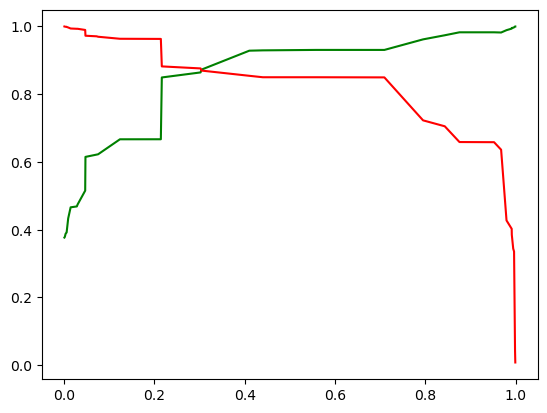

In [240]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Observation:

1. Model is performing well. 
2. The ROC curve has a value of 0.96, which is very good. 

We have the following values for the Train Data:

a. Accuracy : 90.15%
b. Sensitivity : 87.61%
c. Specificity : 91.68%

## Step 10: Making predictions on the test set

In [241]:
# Scaling the test set

num_col_list = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_col_list] = scaler.fit_transform(X_test[num_col_list])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1103,0.713461,1.713072,1.424441,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3775,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3228,0.344615,1.528111,0.901080,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5575,-1.130765,-0.881876,-1.192363,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3871,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [242]:
X_test = X_test[col]
X_test.head()

,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Available,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off
1103,1,0,0,0,0,0,0,1,0,0
3775,0,1,0,0,0,0,0,0,0,0
3228,1,0,0,0,0,1,0,0,0,0
5575,0,0,0,0,0,0,0,0,0,0
3871,0,0,0,0,0,1,0,0,0,0


In [243]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [244]:
y_test_pred = res.predict(X_test_sm)

In [245]:
y_test_pred[:10]

1103    0.996272
3775    0.005508
3228    0.709108
5575    0.029931
3871    0.214151
948     0.967607
8836    0.005508
8512    0.005508
8548    0.075236
2126    0.991267
dtype: float64

In [246]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [247]:
y_pred_1.head()

,0
1103,0.996272
3775,0.005508
3228,0.709108
5575,0.029931
3871,0.214151


In [248]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [249]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [250]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [251]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [252]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1103,0.996272
1,0,3775,0.005508
2,0,3228,0.709108
3,0,5575,0.029931
4,0,3871,0.214151


In [253]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [254]:
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob
0,1,1103,0.996272
1,0,3775,0.005508
2,0,3228,0.709108
3,0,5575,0.029931
4,0,3871,0.214151


In [255]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_prob']]
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob
0,1103,1,0.996272
1,3775,0,0.005508
2,3228,0,0.709108
3,5575,0,0.029931
4,3871,0,0.214151


In [257]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.3 else 0)

In [258]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted
0,1103,1,0.996272,1
1,3775,0,0.005508,0
2,3228,0,0.709108,1
3,5575,0,0.029931,0
4,3871,0,0.214151,0


In [259]:
# Adding lead score against each prospect ID
y_pred_final['Lead_Score'] = y_pred_final.Conversion_prob.map( lambda x: round(x*100))

In [260]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted,Lead_Score
0,1103,1,0.996272,1,100
1,3775,0,0.005508,0,1
2,3228,0,0.709108,1,71
3,5575,0,0.029931,0,3
4,3871,0,0.214151,0,21


In [261]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9035285285285285

In [262]:
confusion_test1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test1

array([[1507,  137],
       [ 120,  900]], dtype=int64)

In [263]:
TP = confusion_test1[1,1] # true positive 
TN = confusion_test1[0,0] # true negatives
FP = confusion_test1[0,1] # false positives
FN = confusion_test1[1,0] # false negatives

In [264]:
# Sensitivity
TP / float(TP+FN)

0.8823529411764706

In [265]:
# Specificity
TN / float(TN+FP)

0.9166666666666666

In [266]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8678881388621023

In [267]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8823529411764706

Observation:

Test Data shows similar results as Train Data:

a. Accuracy : 90.35% 
b. Sensitivity : 88.23%
c. Specificity: 91.66%

## Conclusion:

Below are the variables that can increase leads:
    
1. Last Activity_SMS Sent
2. Last Notable Activity_Modified
3. Tags_Busy
4. Tags_Closed by Horizzon
5. Tags_Lost to EINS
6. Tags_Not Available
7. Tags_Ringing
8. Tags_Will revert after reading the email
9. Tags_in touch with EINS
10. Tags_switched off

Model comparison for Train and Test Data:

Train Data: 

1. Accuracy : 90.15%
2. Sensitivity : 87.61%
3. Specificity : 91.68%

Test Data: 

1. Accuracy : 90.35%%
2. Sensitivity : 88.23%
3. Specificity : 91.66%

The model is able to predict the Conversion Rate and can be used by X Education to target potential leads

## ** End of Case Study **